In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
link = r'/content/drive/MyDrive/Colab Notebooks/datasets/Data_Train.xlsx'
df = pd.read_excel(link)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data = df.copy()

In [ ]:
def change_into_datetime(col):
  train_data[col]=pd.to_datetime(train_data[col])


In [ ]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(feature)

In [ ]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
train_data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [ ]:
train_data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [ ]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['journey_year'] = train_data['Date_of_Journey'].dt.year
train_data.drop('Date_of_Journey',axis = 1,inplace=True)

In [ ]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [ ]:
extract_hour_min(train_data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [ ]:
extract_hour_min(train_data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [ ]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

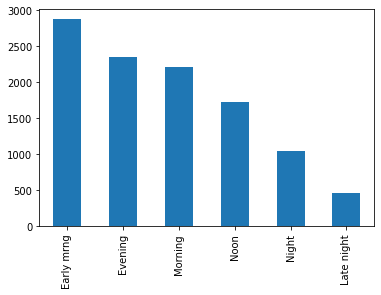

In [ ]:
train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [ ]:
train_data['Duration']= train_data['Duration'].apply(preprocess_duration)

In [ ]:
train_data['Duration_hours']= train_data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [ ]:
train_data['Duration_mins']=  train_data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [ ]:
train_data['Duration_total_mins']= train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

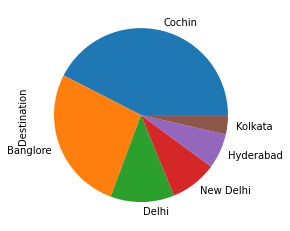

In [ ]:
train_data['Destination'].value_counts().plot(kind='pie')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

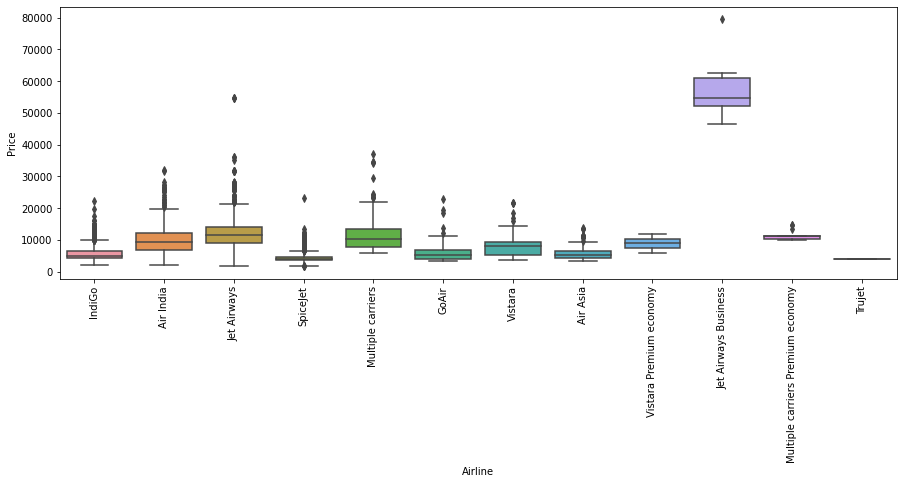

In [ ]:
plt.figure(figsize=(15,5))
sb.boxplot(y='Price',x='Airline',data=train_data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

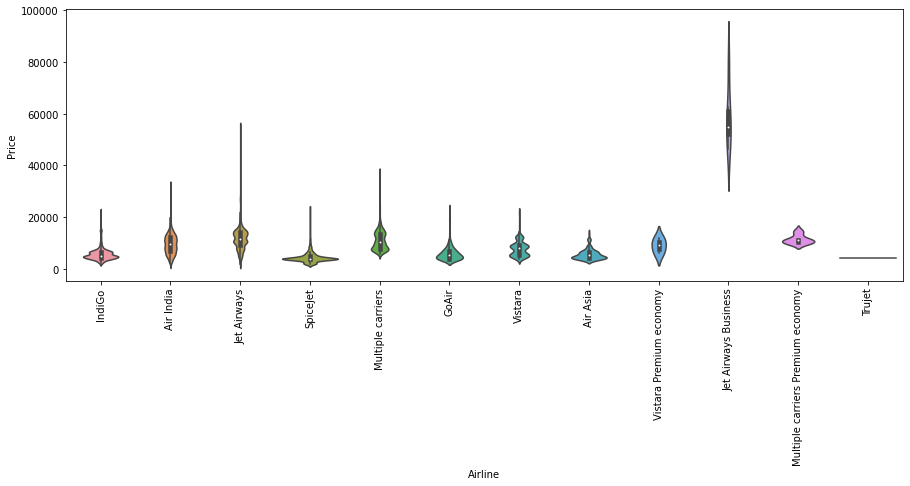

In [ ]:
plt.figure(figsize=(15,5))
sb.violinplot(y='Price',x='Airline',data=train_data)
plt.xticks(rotation='vertical')

In [ ]:
train_data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [ ]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [ ]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']

In [ ]:
num_col=[col for col in train_data.columns if train_data[col].dtype!='object']

In [ ]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [ ]:
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [ ]:
train_data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [ ]:
for category in train_data['Source'].unique():
    train_data['Source_'+category] = train_data['Source'].apply(lambda x: 1 if x==category else 0)

In [ ]:
airlines = train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [ ]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
train_data['Airline'] = train_data['Airline'].map(dict1)
train_data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
train_data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [ ]:
dest = train_data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dict2={key:index for index,key in enumerate(dest,0)}

In [ ]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
train_data['Destination'] = train_data['Destination'].map(dict2)

In [ ]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
train_data['Total_Stops'] = train_data['Total_Stops'].map(stops)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


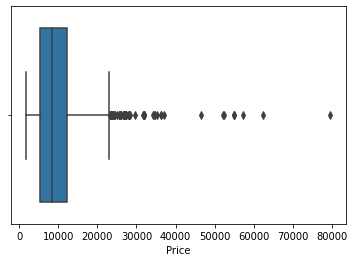

In [ ]:
sb.boxplot(train_data['Price'])

In [ ]:
train_data['Price']=np.where(train_data['Price']>=35000,train_data['Price'].median(),train_data['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


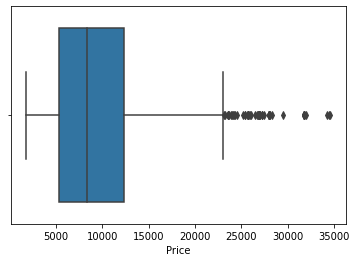

In [ ]:
sb.boxplot(train_data['Price'])

In [ ]:
train_data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [ ]:
train_data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X=train_data.drop(['Price'],axis=1)
y=train_data['Price']

In [ ]:
mutual_info_regression(X,y)

array([0.98157054, 1.00936224, 0.79165879, 0.19577346, 0.22931729,
       0.33421662, 0.2593922 , 0.40113914, 0.34458017, 0.48073965,
       0.34192273, 0.38808125, 0.46572379, 0.52006688, 0.13634492,
       0.2023779 ])

In [ ]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.000709
Airline,0.979811
Total_Stops,0.794836
Source_Delhi,0.523781
Duration_hours,0.464493
Source_Kolkata,0.459400
Arrival_Time_hour,0.401089
Source_Banglore,0.388027
Arrival_Time_minute,0.353994
Duration_mins,0.346276


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ml_model=RandomForestRegressor()
ml_model.fit(X_train,y_train)
y_pred=ml_model.predict(X_test)

In [ ]:
y_pred

array([16738.29,  6491.12,  8872.96, ...,  3493.64,  6123.83,  7273.  ])

In [ ]:
y_pred.shape

(2671,)

In [ ]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

mape(y_test,ml_model.predict(X_test))

13.267073615181186

In [ ]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sb.distplot(y_test-y_prediction)
    

Training_score: 0.9517013971669077
Predictions are : [16712.04  6475.72  8801.03 ...  3479.85  6374.21  6848.59]


r2_score: 0.8037852205702395
MSE :  3819830.774379255
MAE :  1189.357051339058
RMSE :  1954.4387364098304
MAPE :  13.32935043799701


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


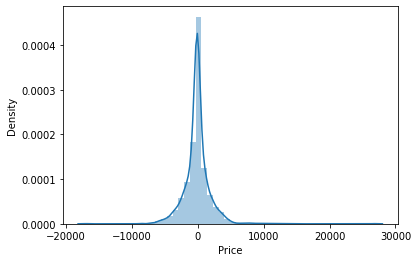

In [ ]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf=RandomForestRegressor()
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=["auto", "sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]


In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split   
}

In [ ]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [ ]:
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [ ]:
pred2=rf_Random.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8265280037942677